Student name: Hoang Tu BUI 

Student id: 24005665

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

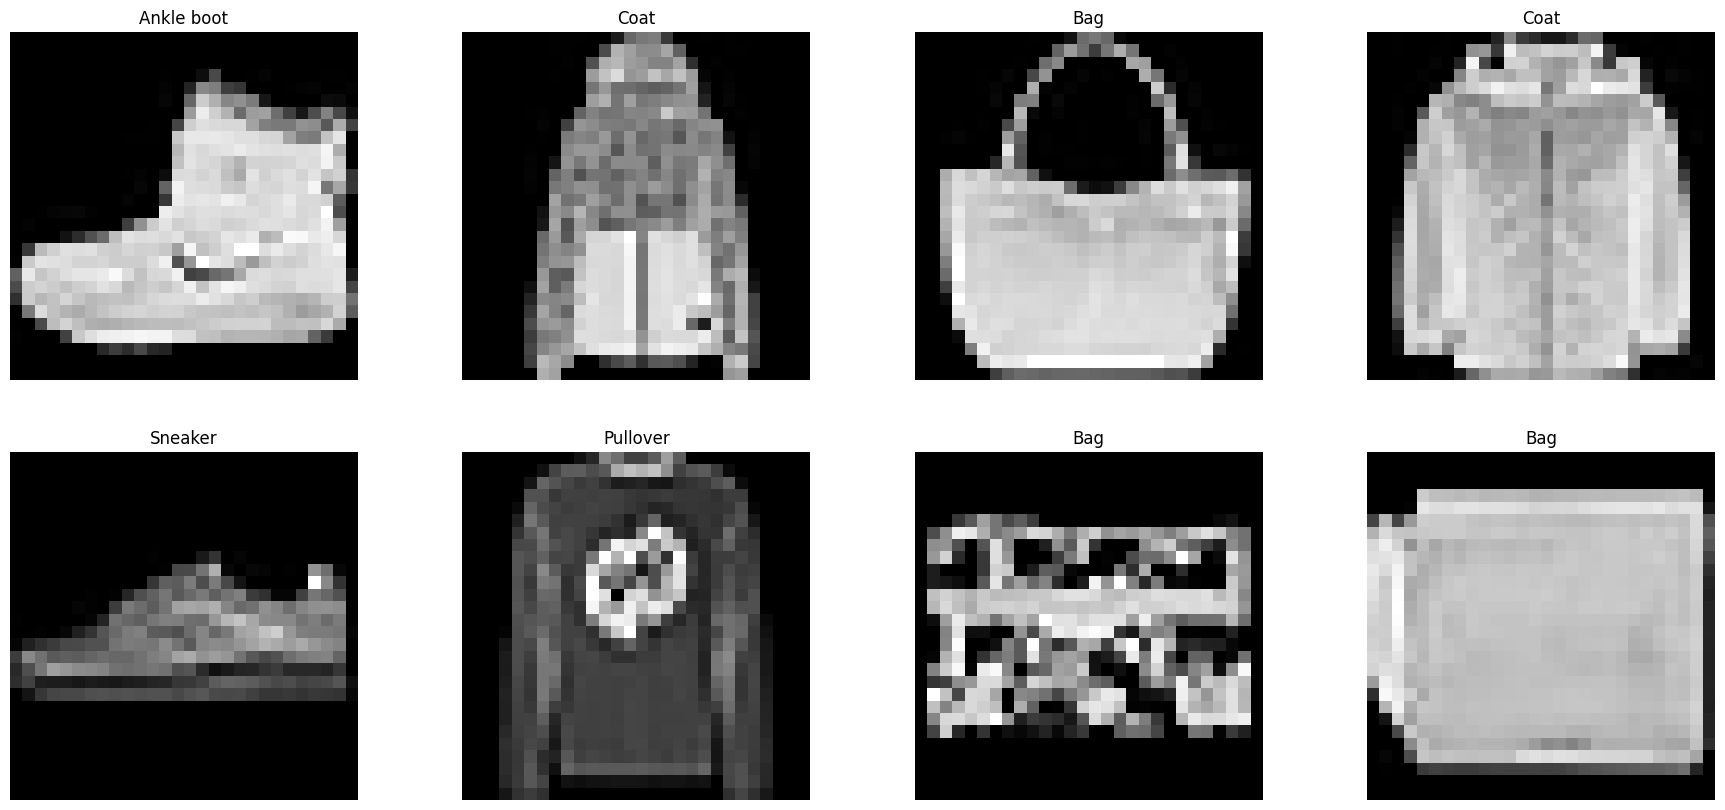

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################
# Your code here
RANDOM_STATE = 27

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

scaler = StandardScaler()
std_X_train = scaler.fit_transform(X_train)
std_X_test = scaler.transform(X_test)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the clothing item that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.linear_model import Perceptron as Perceptron 

##################
# Your code here
perceptron = Perceptron()

perceptron.fit(std_X_train, y_train)

y_pred = perceptron.predict(std_X_test)

In [6]:
from sklearn.metrics import accuracy_score

##################
# Your code here
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8044285714285714


<font color='red'>Enter your text here</font>

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements.

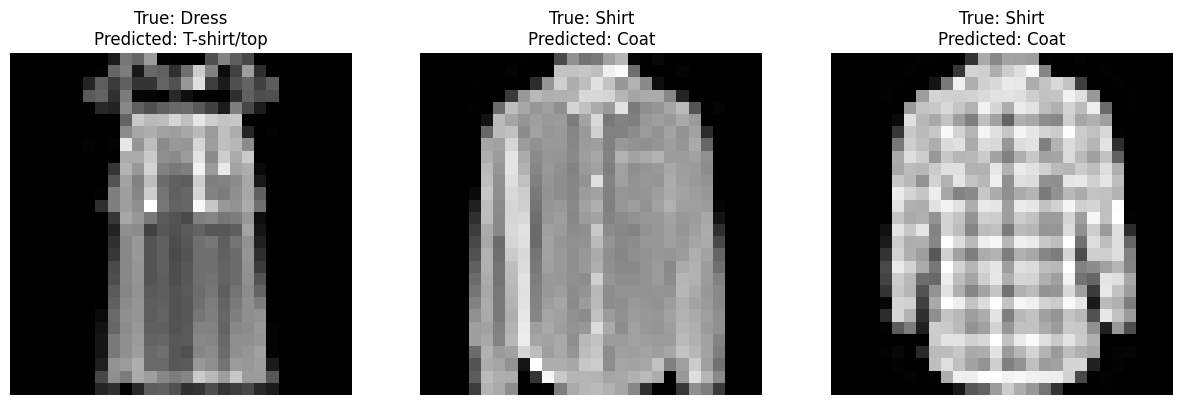

In [7]:
mismatchIndices = np.where(y_test != y_pred)

# choose 3 random mismatched indices
np.random.seed(RANDOM_STATE)
random_indices = np.random.choice(mismatchIndices[0], 3) 

# Visualize the image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = ax.flatten()

for i in range(3):
    ax[i].imshow(np.reshape(X_test[random_indices[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(f"True: {text_labels[int(y_test[random_indices[i]])]}\nPredicted: {text_labels[int(y_pred[random_indices[i]])]}")
    

Some of the wrongly predicted data is of classes that look similar even to human's eyes. Shirt and coat have similar shape. Dress looks very close to top; in reality, some tops and dresses are indistinguishable without their description.

### Multi-class perceptron
1. The model creates distingtive perceptrons for each class. 
1. Each predict if the sample belong that class or not
1. The final prediction is made based on the perceptron with highest score

Example:
Classifier for 3 classes. The model creates 3 Perceptron: P1, P2, P3. They are trained individually to classify if an object is class 1, 2 or 3. For instance, for one sample, the prediction of each Perceptron is as following:

- P1: Probability of being Class 1 (0.7)

- P2: Probability of being Class 2 (0.4)

- P3: Probability of being Class 3 (0.3)

=> Based on the scores, the model makes the prediction for Class 1 since it has the highest score (0.7).


## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [8]:
from sklearn.neural_network import MLPClassifier

#######################
# Your code here
mlpClassifier = MLPClassifier(alpha=0.1, verbose=1, random_state=1, hidden_layer_sizes=(20,))

mlpClassifier.fit(std_X_train, y_train)

y_pred = mlpClassifier.predict(std_X_test)

Iteration 1, loss = 0.63594473
Iteration 2, loss = 0.43184479
Iteration 3, loss = 0.39671677
Iteration 4, loss = 0.37767895
Iteration 5, loss = 0.36394702
Iteration 6, loss = 0.35560943
Iteration 7, loss = 0.34523772
Iteration 8, loss = 0.33951130
Iteration 9, loss = 0.33249884
Iteration 10, loss = 0.32748493
Iteration 11, loss = 0.32367839
Iteration 12, loss = 0.32086063
Iteration 13, loss = 0.31688179
Iteration 14, loss = 0.31339067
Iteration 15, loss = 0.31110411
Iteration 16, loss = 0.30896377
Iteration 17, loss = 0.30644638
Iteration 18, loss = 0.30328471
Iteration 19, loss = 0.30193041
Iteration 20, loss = 0.29921515
Iteration 21, loss = 0.29770593
Iteration 22, loss = 0.29645371
Iteration 23, loss = 0.29542103
Iteration 24, loss = 0.29348261
Iteration 25, loss = 0.29233921
Iteration 26, loss = 0.29010548
Iteration 27, loss = 0.29046869
Iteration 28, loss = 0.28896407
Iteration 29, loss = 0.28600906
Iteration 30, loss = 0.28507294
Iteration 31, loss = 0.28624133
Iteration 32, los

In [9]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here
train_accuracy = accuracy_score(y_train, mlpClassifier.predict(std_X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9289642857142857
Test accuracy: 0.8697857142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

1. The size of input layer is 784 because that is the size of one sample in dataset (28 x 28)
1. The size of output layer is 10 because this is classifier task with 10 categories 
1. Weight: 
    - Input to Hidden layer: 784 x 20
    - Hidden layer to Output: 20 x 10
    
    => Total weight: 15880

1. If the train accuracy is much higher than the test one, it is likely that the model is overfitting. It has memorized patterns specific to the train dataset which reduce the ability to generalize the unseen data.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)

for width in widths:
    mlpClassifier = MLPClassifier(alpha=0.001, verbose=1, random_state=1, hidden_layer_sizes=(width,))
    mlpClassifier.fit(std_X_train, y_train)
    a_train.append(accuracy_score(y_train, mlpClassifier.predict(std_X_train)))
    a_test.append(accuracy_score(y_test, mlpClassifier.predict(std_X_test)))

Iteration 1, loss = 0.62201640
Iteration 2, loss = 0.41627645
Iteration 3, loss = 0.38009782
Iteration 4, loss = 0.35989648
Iteration 5, loss = 0.34487401
Iteration 6, loss = 0.33503255
Iteration 7, loss = 0.32288947
Iteration 8, loss = 0.31602026
Iteration 9, loss = 0.30772452
Iteration 10, loss = 0.30115866
Iteration 11, loss = 0.29627989
Iteration 12, loss = 0.29193380
Iteration 13, loss = 0.28706537
Iteration 14, loss = 0.28237083
Iteration 15, loss = 0.27829335
Iteration 16, loss = 0.27528005
Iteration 17, loss = 0.27070789
Iteration 18, loss = 0.26662609
Iteration 19, loss = 0.26433749
Iteration 20, loss = 0.26083614
Iteration 21, loss = 0.25873919
Iteration 22, loss = 0.25638733
Iteration 23, loss = 0.25391513
Iteration 24, loss = 0.25096086
Iteration 25, loss = 0.24867544
Iteration 26, loss = 0.24549049
Iteration 27, loss = 0.24529796
Iteration 28, loss = 0.24296378
Iteration 29, loss = 0.23898811
Iteration 30, loss = 0.23694021
Iteration 31, loss = 0.23692211
Iteration 32, los

/home/tu/micromamba/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53215109
Iteration 2, loss = 0.37417098
Iteration 3, loss = 0.33725418
Iteration 4, loss = 0.31495276
Iteration 5, loss = 0.29269775
Iteration 6, loss = 0.27978178
Iteration 7, loss = 0.26688904
Iteration 8, loss = 0.25429232
Iteration 9, loss = 0.24652769
Iteration 10, loss = 0.23566496
Iteration 11, loss = 0.22742448
Iteration 12, loss = 0.21811932
Iteration 13, loss = 0.21470400
Iteration 14, loss = 0.20650020
Iteration 15, loss = 0.20264790
Iteration 16, loss = 0.19358902
Iteration 17, loss = 0.19112166
Iteration 18, loss = 0.18481448
Iteration 19, loss = 0.17752631
Iteration 20, loss = 0.17668678
Iteration 21, loss = 0.17088307
Iteration 22, loss = 0.16853262
Iteration 23, loss = 0.16360610
Iteration 24, loss = 0.15938208
Iteration 25, loss = 0.15456840
Iteration 26, loss = 0.15326997
Iteration 27, loss = 0.14747069
Iteration 28, loss = 0.14652848
Iteration 29, loss = 0.14148514
Iteration 30, loss = 0.14002195
Iteration 31, loss = 0.13647413
Iteration 32, los

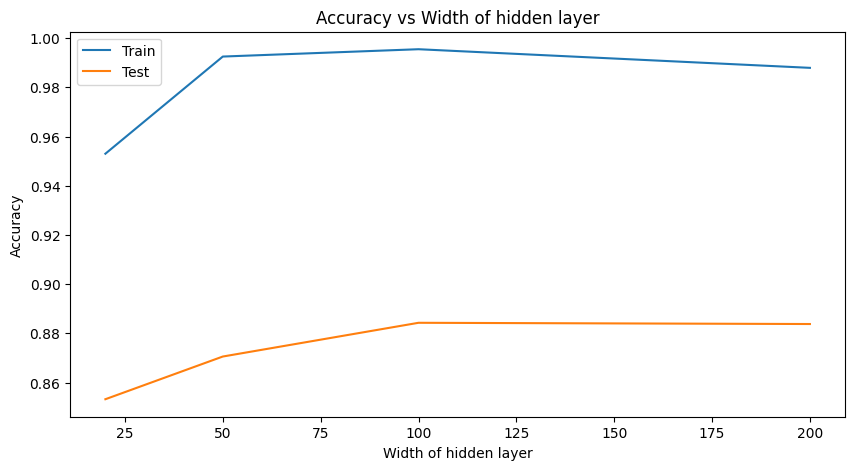

In [11]:
import matplotlib.pyplot as plt

########################
# Your plot of training and test accuracy here
plt.figure(figsize=(10, 5))
plt.plot(widths, a_train, label="Train")
plt.plot(widths, a_test, label="Test")
plt.xlabel("Width of hidden layer")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Width of hidden layer")
plt.legend()
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

1. It seems that with longer width, the more time the model need to train. This can be due to the fact that there are more weights to adjust compare to model with shorter width. Although number of epochs needed for training reduced by more than half (comparing width 200 and 20), the number of weight changes for each epochs are ten times more.

1. The graph shows an improvement in both training and testing accuracy with the increment of width till 100. After that, both slowly decline.
At 100, number of weight in the model is 784 x 100 + 100 x 10 = 79400.
There is a significant gap between train and test accuracy (10%) across all number of width which suggests the model is overfitting. The problem persisting with the range number of widths shows that adding more neurons won't help.
We may try to increase alpha (regularization) to reduce it during training or using PCA and LDA to help reducing number of dimensions, noise and seperating classes.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [12]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for layer in layers:
    mlpClassifier = MLPClassifier(alpha=0.001, verbose=1, random_state=1, hidden_layer_sizes=layer)
    mlpClassifier.fit(std_X_train, y_train)
    a_train.append(accuracy_score(y_train, mlpClassifier.predict(std_X_train)))
    a_test.append(accuracy_score(y_test, mlpClassifier.predict(std_X_test)))



Iteration 1, loss = 0.68051335
Iteration 2, loss = 0.41570547
Iteration 3, loss = 0.37449823
Iteration 4, loss = 0.35187062
Iteration 5, loss = 0.33756512
Iteration 6, loss = 0.32653753
Iteration 7, loss = 0.31727637
Iteration 8, loss = 0.30922803
Iteration 9, loss = 0.30182901
Iteration 10, loss = 0.29517707
Iteration 11, loss = 0.28932675
Iteration 12, loss = 0.28749541
Iteration 13, loss = 0.28114683
Iteration 14, loss = 0.27665221
Iteration 15, loss = 0.27200520
Iteration 16, loss = 0.26710010
Iteration 17, loss = 0.26511156
Iteration 18, loss = 0.26220127
Iteration 19, loss = 0.25845123
Iteration 20, loss = 0.25436125
Iteration 21, loss = 0.25201164
Iteration 22, loss = 0.25018626
Iteration 23, loss = 0.24712457
Iteration 24, loss = 0.24462402
Iteration 25, loss = 0.24226694
Iteration 26, loss = 0.23901132
Iteration 27, loss = 0.23647477
Iteration 28, loss = 0.23602488
Iteration 29, loss = 0.23148932
Iteration 30, loss = 0.23153640
Iteration 31, loss = 0.22898445
Iteration 32, los

/home/tu/micromamba/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.73353153
Iteration 2, loss = 0.43775303
Iteration 3, loss = 0.39023658
Iteration 4, loss = 0.36180900
Iteration 5, loss = 0.34837522
Iteration 6, loss = 0.33126030
Iteration 7, loss = 0.32018100
Iteration 8, loss = 0.31058389
Iteration 9, loss = 0.30514415
Iteration 10, loss = 0.29537592
Iteration 11, loss = 0.29044216
Iteration 12, loss = 0.28398521
Iteration 13, loss = 0.27974037
Iteration 14, loss = 0.27543242
Iteration 15, loss = 0.27303012
Iteration 16, loss = 0.26620682
Iteration 17, loss = 0.26383682
Iteration 18, loss = 0.25975794
Iteration 19, loss = 0.25715081
Iteration 20, loss = 0.25244696
Iteration 21, loss = 0.24877614
Iteration 22, loss = 0.24543463
Iteration 23, loss = 0.24473945
Iteration 24, loss = 0.24145105
Iteration 25, loss = 0.23771970
Iteration 26, loss = 0.23629314
Iteration 27, loss = 0.23168707
Iteration 28, loss = 0.23235910
Iteration 29, loss = 0.23021823
Iteration 30, loss = 0.22465715
Iteration 31, loss = 0.22486681
Iteration 32, los

/home/tu/micromamba/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.57109173
Iteration 2, loss = 0.38144155
Iteration 3, loss = 0.34294801
Iteration 4, loss = 0.32110744
Iteration 5, loss = 0.29882174
Iteration 6, loss = 0.28386297
Iteration 7, loss = 0.27027813
Iteration 8, loss = 0.26040714
Iteration 9, loss = 0.25035179
Iteration 10, loss = 0.23946012
Iteration 11, loss = 0.23349969
Iteration 12, loss = 0.22153366
Iteration 13, loss = 0.22084045
Iteration 14, loss = 0.21186558
Iteration 15, loss = 0.20506941
Iteration 16, loss = 0.19735564
Iteration 17, loss = 0.19251201
Iteration 18, loss = 0.18931312
Iteration 19, loss = 0.18469421
Iteration 20, loss = 0.17681068
Iteration 21, loss = 0.17366598
Iteration 22, loss = 0.16888286
Iteration 23, loss = 0.16411342
Iteration 24, loss = 0.16227918
Iteration 25, loss = 0.15720524
Iteration 26, loss = 0.15199589
Iteration 27, loss = 0.15179626
Iteration 28, loss = 0.14570294
Iteration 29, loss = 0.14578344
Iteration 30, loss = 0.14044907
Iteration 31, loss = 0.14220764
Iteration 32, los

Text(0.5, 1.0, 'Accuracy vs Layers')

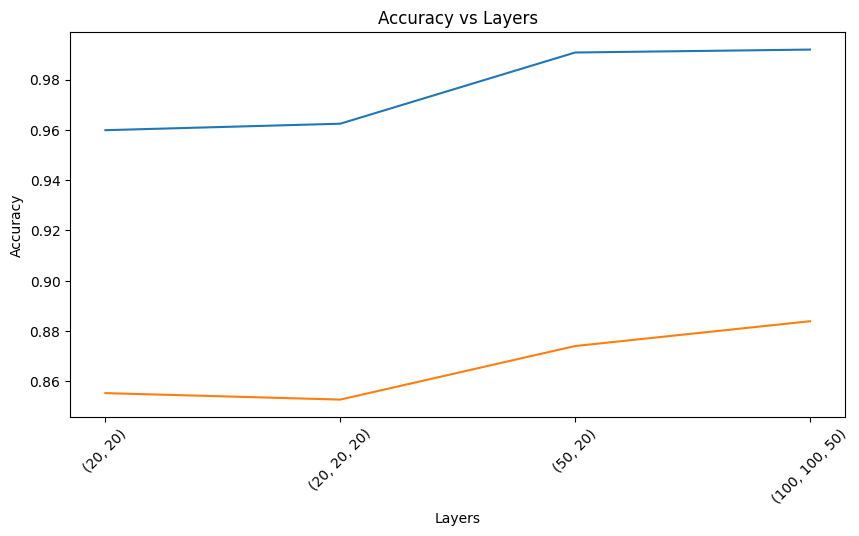

In [13]:
import matplotlib.pyplot as plt

########################
# Your visualisation code here
plt.figure(figsize=(10, 5))
plt.plot(range(len(layers)), a_train, label="Train")
plt.plot(range(len(layers)), a_test, label="Test")
plt.xticks(range(len(layers)), [str(layer) for layer in layers], rotation=45)
plt.xlabel("Layers")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Layers")


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

The training accuracy consistently increases with deeper and wider architectures with 50,2 and 100,100,50 got the best accuracies.
However, model with 20,20,20 exibits a decline in test accuracy. This shows that simply increasing depth does not guarantee better performance. It does capture more complex features (higher train accuracy) but this, in turn, leads to overfitting.
It looks like having both wide and deep architecture helps improve test accuracy. The limit here may be 100 in width, same with what found in previous task. 
With depth and width of the next layers, there is no current prove to dictate that.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

In [14]:
########################
# Your code here


from sklearn.metrics import confusion_matrix


confusionMatrix = confusion_matrix(y_test, y_pred)  # the last one is the best prediction
confusionMatrix

array([[1093,    4,   24,   38,    6,    2,  180,    0,   13,    0],
       [   5, 1342,    5,   21,    1,    0,    6,    0,    1,    0],
       [  16,    2, 1116,   22,  113,    3,  122,    0,    6,    0],
       [  62,   17,   12, 1226,   31,    1,   54,    0,    8,    1],
       [   3,    3,  101,   45, 1132,    0,  109,    0,    5,    1],
       [   0,    0,    1,    0,    0, 1375,    1,   45,    6,   19],
       [ 183,    7,  116,   42,   97,    1,  972,    0,   19,    0],
       [   0,    0,    0,    0,    0,   34,    0, 1305,    4,   20],
       [  15,    1,    4,    9,    5,   20,   23,    9, 1303,    1],
       [   0,    0,    0,    0,    0,   27,    1,   68,    2, 1313]])

<font color='red'>Enter your text here</font>

The matrix have high diagonal values. This indicates model has correctly classified the majority of dataset.
At 0,6 and 6,0 there are about 180 cases of mis-classified, it is likely that these 2 class share similar traits (Ex: coat vs shirt).
We can also see this happens to class 2 and class 6.
Class 7 shows low misclassification overall, as indicated by the mostly diagonal counts. 